# Espiral builts from semicircunferences



In [1]:
#Librerias
import numpy as np

from scipy import integrate
#import filon
from filon import cos_integral
from filon import sin_integral
import pylab as plt
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral
import scipy.interpolate as interpolate


## Parameter of Spiral and Donor Position

In [2]:
#Spiral parameters
NP= 501  #Number of Fourier coeficcients 
narc=10  # semi-arcs s
Rr0= 1   # Initial Radius of  de Curvature
DR=0.1   # Raise in semi-arc
sf=SF=narc*(Rr0+0.5*(narc-1)*DR)*np.pi  #Total Arc length of Spiral
#SD=0.5*SF #0.5*SF  #Arc length of donor position
H=SF/(NP-1)   
Vp = np.zeros(NP) #Array of Potential


## Distancia Espiral construida por semicircunferencias

In [3]:
n=narc
def pos(S,R0,dr):
        ss= np.zeros(n)
        rr= np.zeros(n)
        for i in range(n):
            ss[i] = (i+1)*np.pi*(R0+0.5*i*dr)
            rr[i] = R0 + i*dr
       # print(ss,rr)
        i=0
        phi=0
        while i <= n:
            if S > ss[i]:
                i=i+1
                Phi=S/rr[i]
            else:
                sss= abs(S-ss[i])
                Phi=S/rr[i]
                phi= np.pi - sss/rr[i] 
                R=rr[i]
                if i % 2 == 0:          
                    x=R*np.cos(phi)
                    y=R*np.sin(phi)
                elif i%2 == 1:
                    phi= phi+ np.pi          
                    x=R*np.cos(phi)+dr
                    y=R*np.sin(phi)
                return [x,y,R,Phi]

def distancia(s,sd,R0,dr):
    xs,ys,Rs,fis=pos(s,R0,dr)
    xd,yd,Rd,fid=pos(sd,R0,dr)
    return [np.sqrt((xs-xd)**2+(ys-yd)**2+0.25),Rs,xs,ys,fis,fid]

## Effective potential:$V_{pot}(x,y,z)= V_{pot}(s) = -\frac{1}{4R_s^2} -\frac{2}{\sqrt{(xs-xd)^2 +(ys-yd)^2 + 0.025}}$
###  Coefic de Vpot: $\frac{1}{S_f} \int \limits_0^{S_f} V_{pot}(s)\cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s$
####  Filon.cos_integral calculates the integral:  $ \int_{x_0}^{2n\Delta x} f(x) \cos(k x) dx $

In [4]:
#Parametros: Campo Eléctrico


#-----------------Angulo de campo electrico entre 0 y 2pi?
teta = 0.0

F_grid_CAMP_kv =   np.array([0.0, 1.0,  2.0,3.0,4.0,5.0, 6.0]) #np.linspace(0, 2.0, 100)
nF= len(F_grid_CAMP_kv)
Camp_F = np.zeros(nF)

Camp_F[:]= 0.17*F_grid_CAMP_kv[:]   #adimencional Field
klave=1

In [5]:
def Vpot(s,sd,f):
    Vpot = np.zeros(nF)
    Red,Rs,XS,YS,fis,FID=distancia(s,sd,Rr0,DR)
    ro= Rs
    Vpot[f]=Camp_F[f]*ro*np.cos(fis-teta)-0.25/(Rs**2) - 2.0/Red**2
    return Vpot[f]

In [32]:
#Parametros de la integral (sF,Vpot,ND,CF,AR,EV,VECR) 
#---------------------------------------------------
# Donor position
ND= 30
SD_grid =  np.linspace(0, sf, ND) #np.array([0.2*SF, 0.4*SF, 0.6*SF]) #(ssfi(4*np.pi)),(ssfi(6*np.pi))]) np.array([26.77, 45.01]) SD_grid =  #np.linspace(0, sf, ND) 

Ndonor = len(SD_grid)
phi_D = np.zeros( Ndonor)
#---------------------------------------------------
                    # Electron position
Nelectron=501
SE_grid = np.linspace(0, sf, Nelectron) 
phi_e=np.zeros(Nelectron) # Electron position
XS1 = np.zeros(Nelectron)
YS1 = np.zeros(Nelectron)
SF_SD= np.zeros(Ndonor)

ds= sf/(Nelectron)

    
#---------------------------------------------------
                    # Potential 
VS=np.zeros(shape=(nF,Ndonor,Nelectron)) #ARRAY 3D nn--->electric Fields ND---> Fourier COEF 
kindex=np.zeros(Nelectron)
#---------------------------------------------------       
VS1=np.zeros(shape=(nF,Ndonor,Nelectron))
kindex1=np.zeros(Nelectron)
for f  in range(0, nF):
    for j  in range(1, Ndonor+1):
        sd = SD_grid[j-1]
        SF_SD[j-1] = sd/sf 
        XD,YD,RD,phi_D[j-1] = pos(sd,Rr0,DR)
        for k in range( 0,Nelectron):
            se =SE_grid[k]
            XS,YS,RS,fis = pos(se,Rr0,DR)
            XS1[k]=XS
            YS1[k]=YS
            phi_e[k]= fis
            kindex[k]= (k*np.pi/sf)
            VS[f,j-1,k] = Vpot(se,sd,f)




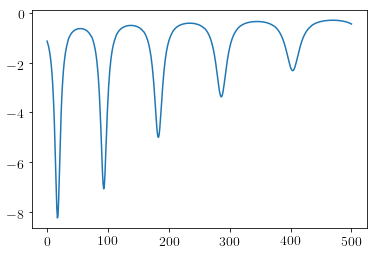

In [33]:
plt.plot(VS[0,1,:])

In [34]:
NP= 500
Phi=np.zeros(NP)
Rs=np.zeros(NP)
Xs=np.zeros(NP)
Ys=np.zeros(NP)
Ss=np.zeros(NP)
hh=sf/(NP-1)
for j in range(1,NP+1):
    s = hh*(j-1)
    Red,RadiosS,XS,YS,fis,fid = distancia(s,0,Rr0,DR)
    Phi[j-1] = fis
    Rs[j-1] = RadiosS
    Xs[j-1] = XS
    Ys[j-1] = YS
    Ss[j-1] = s

Text(0,0.5,'$\\varphi $(rad)')

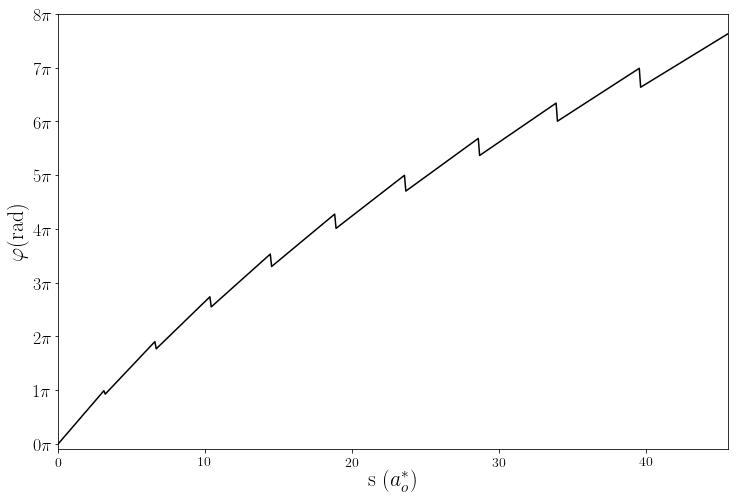

In [35]:
fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)
plt.plot(Ss,Phi, color="black", linewidth=1.5, linestyle="-")
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
ax.set_ylim(-0.3, Phi.max()  )
ax.set_xlim(0, Ss.max()  )
#ax.set_xlim(-0.3, SE_grid.max() + 5 )
#plt.scatter(6, 0.00025, s=500, color='lightcoral')
x_pi   = Phi
unit   = 1
y_tick = np.arange(0, 8+unit, 1*unit)
y_label = [r"$" + format(r, ".2g")+ r"\pi$" for r in y_tick] # [r"$0$", r"$3 \pi$", r"$6\pi$", r"$9\pi$" ]#,   r"$+\frac{\pi}{2}$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=18)
ax.set_xlabel('s ($a_o^*$)', fontsize=22)
ax.set_ylabel('$\\varphi $(rad)', fontsize=22)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
#plt.box(False)

In [21]:
### Filon's Method : Highly Oscillatory Integrals

### Calculation of the Fourier coefficients in Vpot(x) the Fourier series expansio

##### $COEF= \int\limits_0 ^{SF} VS\cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s = \int\limits_0 ^{SF}  VS\cos\left( \, \mathrm{kindex}\,  s\right) \mathrm{d}s  $
###### $kindex=\frac{k\pi}{S_f}$

In [36]:
COEF=np.zeros((nF,Ndonor,Nelectron))
for j in range(0,Ndonor):
    for i in range(0,nF):
        COEF[i,j,:]=(1/sf)*(cos_integral(VS[i,j,:],ds, kindex, x0=0.0, axis=0))
#plt.plot(kindex, COEF[-1,6,:])

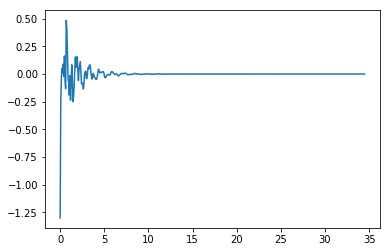

In [23]:
#COEF[:,:,-1] =
plt.plot(kindex, COEF[0,2,:])

### Formación de Matriz $ A_{mn}= \frac{\pi^2 n^2}{S_F^2} \delta _{n,n'} +  I ( | n-n'|) - I( n+ n') $

#### donde $ I(k)= \frac{1}{S_F} \int \limits_0 ^{SF} V_{pot}(S) \cos\left(\frac{k\pi}{S_f}s\right) \mathrm{d}s $

In [37]:
nd=int(Nelectron/2)
AR=np.zeros(shape=(nd,nd)) # Empty Array "2Dimencional"
eigenvalues = np.zeros(shape=(nF,Ndonor,nd))
eigenvectors = np.zeros(shape=(nF,Ndonor,nd,nd))
Ee = np.zeros(shape=(nF,Ndonor,nd))
VecR = np.zeros(shape=(nF,Ndonor,nd,nd))

for j in range(0,nF):
    for s in range(0,Ndonor):
        for k in range(0,nd):
            for k1 in range(0,nd):
                ka=abs(k-k1)
                AR[k,k1]=0.5*(COEF[j,s,ka] - COEF[j,s,k+k1])
                if (k == k1):
                    AR[k,k1]=AR[k,k1]+(np.pi*k/sf)**2
        eigenvalues[j,s] ,eigenvectors[j,s] = np.linalg.eigh(AR)

   #     w : (…, M) ndarray  #The eigenvalues in ascending order, each repeated according to its multiplicity.

#v : {(…, M, M) ndarray, (…, M, M) matrix}  #The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. Will return a matrix object if a is a matrix object

for j in range(0,Ndonor):
    for f in range(nF):
   # eigein_value=np.sort(eigenvalues[:,j])
    # eigein_vector=np.sort(eigenvectors[:,j])
        Ee[f,j]   =  eigenvalues[f,j,0:nd] # eigein_value[0:nd]
        VecR[f,j] =  eigenvectors[f,j,0:nd,0:nd] #eigein_vector[0:nd,0:nd]

#plt.plot(phi_D,Ee[0,:,0:10])

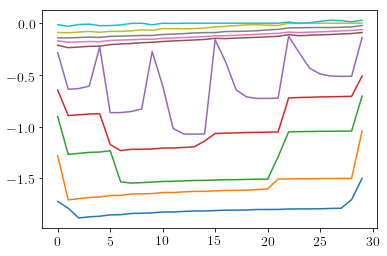

In [38]:
plt.plot(Ee[0,:,0:10])

In [26]:
SD_grid, SF_SD

(array([ 0.        ,  2.39753124,  4.79506247,  7.19259371,  9.59012494,
        11.98765618, 14.38518741, 16.78271865, 19.18024989, 21.57778112,
        23.97531236, 26.37284359, 28.77037483, 31.16790606, 33.5654373 ,
        35.96296853, 38.36049977, 40.75803101, 43.15556224, 45.55309348]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]))

# Energy- Position

## F= 0.0

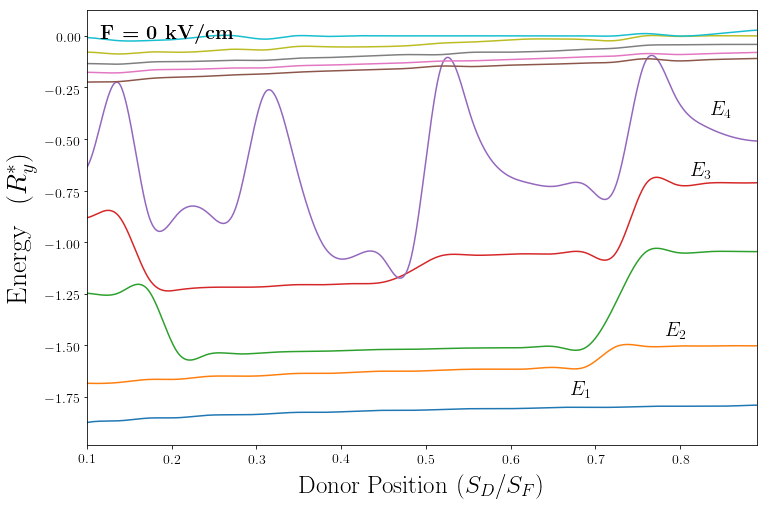

In [42]:
x =  SF_SD
p = 0 
y0 =  Ee[0,:,0]
y1 =  Ee[0,:,1]
y2 =  Ee[0,:,2]
y3 =  Ee[0,:,3]
y4 =  Ee[0,:,4]
y5 =  Ee[p,:,5]
y6 =  Ee[p,:,6]
y7 =  Ee[p,:,7]
y8 =  Ee[p,:,8]
y9 =  Ee[p,:,9]

t0, c0, k0 = interpolate.splrep(x, y0, s=0, k=3)
t1, c1, k1 = interpolate.splrep(x, y1, s=0, k=3)
t2, c2, k2 = interpolate.splrep(x, y2, s=0, k=3)
t3, c3, k3 = interpolate.splrep(x, y3, s=0, k=3)
t4, c4, k4 = interpolate.splrep(x, y4, s=0, k=3)
t5, c5, k5 = interpolate.splrep(x, y5, s=0, k=3)
t6, c6, k6 = interpolate.splrep(x, y6, s=0, k=3)
t7, c7, k7 = interpolate.splrep(x, y7, s=0, k=3)
t8, c8, k8 = interpolate.splrep(x, y8, s=0, k=3)
t9, c9, k9 = interpolate.splrep(x, y9, s=0, k=3)


N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)

spline0 = interpolate.BSpline(t0, c0, k0, extrapolate=False)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=False)
spline2 = interpolate.BSpline(t2, c2, k2, extrapolate=False)
spline3 = interpolate.BSpline(t3, c3, k3, extrapolate=False)
spline4 = interpolate.BSpline(t4, c4, k4, extrapolate=False)
spline5 = interpolate.BSpline(t5, c5, k5, extrapolate=False)
spline6 = interpolate.BSpline(t6, c6, k6, extrapolate=False)
spline7 = interpolate.BSpline(t7, c7, k7, extrapolate=False)
spline8 = interpolate.BSpline(t8, c8, k8, extrapolate=False)
spline9 = interpolate.BSpline(t9, c9, k9, extrapolate=False)


fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'Donor Position (\textbf{$S_D$}/\textbf{$S_F$})',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.xlim(0.1,0.89)
#plt.ylim(-1.9,-0.6)

plt.annotate(r'\textbf{F = 0 kV/cm}', xy=(100, 470), xycoords='figure points',fontsize=20)
#plt.annotate('$\\theta\,   = \, \, \pi $', xy=(150, 85), xycoords='figure points',fontsize=24)

plt.annotate(r'\textbf{$E_1$}', xy=(570, 110), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_2$}', xy=(665, 170), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_3$}', xy=(690, 330), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_4$}', xy=(710, 390), xycoords='figure points',fontsize=20)
#plt.title('$Caso: R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)

plt.plot(xx, spline0(xx), label='BSpline')
plt.plot(xx, spline1(xx), label='BSpline')
plt.plot(xx, spline2(xx), label='BSpline')
plt.plot(xx, spline3(xx), label='BSpline')
plt.plot(xx, spline4(xx), label='BSpline')
plt.plot(xx, spline5(xx), label='BSpline')
plt.plot(xx, spline6(xx), label='BSpline')
plt.plot(xx, spline7(xx), label='BSpline')
plt.plot(xx, spline8(xx), label='BSpline')
plt.plot(xx, spline9(xx), label='BSpline')

#plt.grid()
#plt.legend(loc='best')


plt.savefig('2SemE-0.png',format='png', dpi=1000,bbox_inches="tight")
plt.savefig('2SemE-0.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## F= 1 kV/cm

In [131]:
Camp_F/0.17

array([0., 1., 2., 3., 4., 5., 6.])

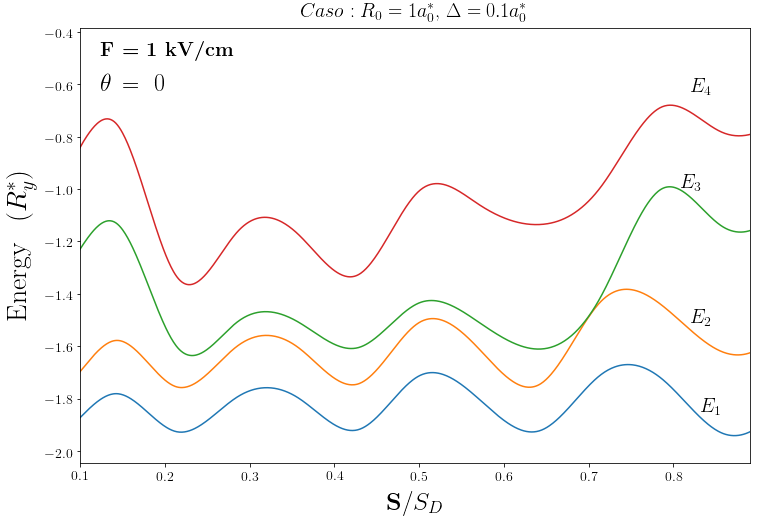

In [146]:
x =  SF_SD
y1 =  Ee[1,:,0]
y2 =  Ee[1,:,1]
y3 =  Ee[1,:,2]
y4 =  Ee[1,:,3]


t1, c1, k1 = interpolate.splrep(x, y1, s=0, k=3)
t2, c2, k2 = interpolate.splrep(x, y2, s=0, k=3)
t3, c3, k3 = interpolate.splrep(x, y3, s=0, k=3)
t4, c4, k4 = interpolate.splrep(x, y4, s=0, k=3)


N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=False)
spline2 = interpolate.BSpline(t2, c2, k2, extrapolate=False)
spline3 = interpolate.BSpline(t3, c3, k3, extrapolate=False)
spline4 = interpolate.BSpline(t4, c4, k4, extrapolate=False)


fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'\textbf{S}/\textbf{$S_D$}',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.xlim(0.1,0.89)
#plt.ylim(-1.9,-0.6)

plt.annotate(r'\textbf{F = 1 kV/cm}', xy=(100, 470), xycoords='figure points',fontsize=20)
plt.annotate('$\\theta\,   = \, \, 0 $', xy=(100, 435), xycoords='figure points',fontsize=24)

plt.annotate(r'\textbf{$E_1$}', xy=(700, 110), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_2$}', xy=(690, 200), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_3$}', xy=(680, 335), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_4$}', xy=(690, 430), xycoords='figure points',fontsize=20)
plt.title('$Caso: R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)


plt.plot(xx, spline1(xx), label='BSpline')
plt.plot(xx, spline2(xx), label='BSpline')
plt.plot(xx, spline3(xx), label='BSpline')
plt.plot(xx, spline4(xx), label='BSpline')

#plt.grid()
#plt.legend(loc='best')


#plt.savefig('SemE-1.png',format='png', dpi=1000,bbox_inches="tight")
#plt.savefig('SemE-1.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## F =  5 kV/ cm

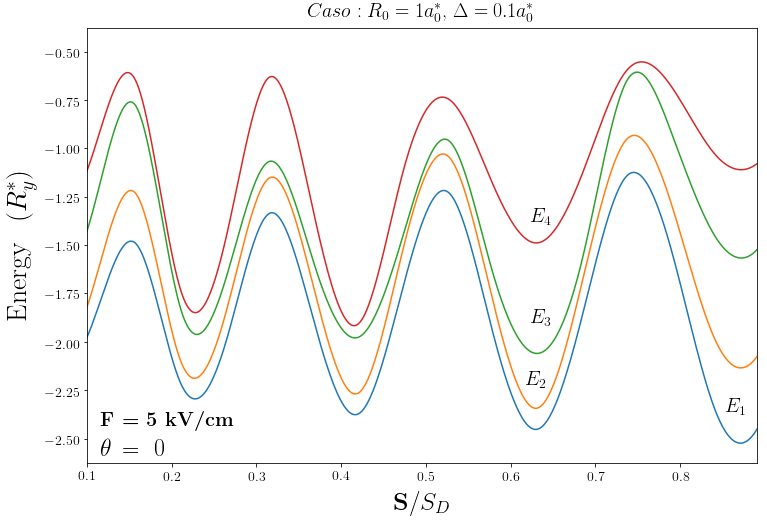

In [177]:
x =  SF_SD
y1 =  Ee[5,:,0]
y2 =  Ee[5,:,1]
y3 =  Ee[5,:,2]
y4 =  Ee[5,:,3]


t1, c1, k1 = interpolate.splrep(x, y1, s=0, k=3)
t2, c2, k2 = interpolate.splrep(x, y2, s=0, k=3)
t3, c3, k3 = interpolate.splrep(x, y3, s=0, k=3)
t4, c4, k4 = interpolate.splrep(x, y4, s=0, k=3)


N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=False)
spline2 = interpolate.BSpline(t2, c2, k2, extrapolate=False)
spline3 = interpolate.BSpline(t3, c3, k3, extrapolate=False)
spline4 = interpolate.BSpline(t4, c4, k4, extrapolate=False)


fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'\textbf{S}/\textbf{$S_D$}',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.xlim(0.1,0.89)
#plt.ylim(-1.9,-0.6)

plt.annotate(r'\textbf{F = 5 kV/cm}', xy=(100, 100), xycoords='figure points',fontsize=20)
plt.annotate('$\\theta\,   = \, \, 0 $', xy=(100, 70), xycoords='figure points',fontsize=24)

plt.annotate(r'\textbf{$E_1$}', xy=(725, 110), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_2$}', xy=(525, 138), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_3$}', xy=(530, 200), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$E_4$}', xy=(530, 300), xycoords='figure points',fontsize=20)
#plt.title('$Caso: R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)


plt.plot(xx, spline1(xx), label='BSpline')
plt.plot(xx, spline2(xx), label='BSpline')
plt.plot(xx, spline3(xx), label='BSpline')
plt.plot(xx, spline4(xx), label='BSpline')

#plt.grid()
#plt.legend(loc='best')


#plt.savefig('SemE-5.png',format='png', dpi=1000,bbox_inches="tight")
#plt.savefig('SemE-5.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

# GAPS Energy

## F = 0 kV/cm

## $R0$ = 1 ($a_o^*$) 

In [43]:

x =  SF_SD
p=0
y1 =  abs(Ee[p,:,0] -  Ee[p,:,1])
y2 =  abs(Ee[p,:,0] -  Ee[p,:,2])
y3 =  abs(Ee[p,:,0] -  Ee[p,:,3])
y4 =  abs(Ee[p,:,0] -  Ee[p,:,4])
y5 =  abs(Ee[p,:,0] -  Ee[p,:,5])
y6 =  abs(Ee[p,:,0] -  Ee[p,:,6])
y7 =  abs(Ee[p,:,0] -  Ee[p,:,7])
y8 =  abs(Ee[p,:,0] -  Ee[p,:,8])
y8 =  abs(Ee[p,:,0] -  Ee[p,:,9])
y10 =  abs(Ee[p,:,0] -  Ee[p,:,10])

#y1 =  abs(Ee[-1,:,0] -  Ee[-1,:,1])
#y2 =  abs(Ee[-1,:,0] -  Ee[-1,:,2])
#y3 =  abs(Ee[-1,:,0] -  Ee[-1,:,3])
#y4 =  abs(Ee[-1,:,0] -  Ee[-1,:,4])

t1, c1, k1 = interpolate.splrep(x, y1, s=0, k=3)
t2, c2, k2 = interpolate.splrep(x, y2, s=0, k=3)
t3, c3, k3 = interpolate.splrep(x, y3, s=0, k=3)
t4, c4, k4 = interpolate.splrep(x, y4, s=0, k=3)
t5, c5, k5 = interpolate.splrep(x, y5, s=0, k=3)
t6, c6, k6 = interpolate.splrep(x, y6, s=0, k=3)
t7, c7, k7 = interpolate.splrep(x, y7, s=0, k=3)
t8, c8, k8 = interpolate.splrep(x, y8, s=0, k=3)
t9, c9, k9 = interpolate.splrep(x, y9, s=0, k=3)
t10, c10, k10 = interpolate.splrep(x, y10, s=0, k=3)


#print('''\
#t: {}
#3c: {}
#k: {}
#'''.format(t, c, k))
N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=False)
spline2 = interpolate.BSpline(t2, c2, k2, extrapolate=False)
spline3 = interpolate.BSpline(t3, c3, k3, extrapolate=False)
spline4 = interpolate.BSpline(t4, c4, k4, extrapolate=False)
spline5 = interpolate.BSpline(t5, c5, k5, extrapolate=False)
spline6 = interpolate.BSpline(t6, c6, k6, extrapolate=False)
spline7 = interpolate.BSpline(t7, c7, k7, extrapolate=False)
spline8 = interpolate.BSpline(t8, c8, k8, extrapolate=False)
spline9 = interpolate.BSpline(t9, c9, k9, extrapolate=False)
spline10 = interpolate.BSpline(t10, c10, k10, extrapolate=False)


fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'Donor Position (\textbf{$S_D$}/\textbf{$S_F$})',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy gaps \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xlim(0.12,0.98)
plt.annotate(r'\textbf{F = 0 kV/cm}', xy=(280, 470), xycoords='figure points',fontsize=20)



plt.xlim(0.1,0.89)
#plt.ylim(-0.05,1.2)

plt.annotate(r'\textbf{$\Delta_{1,2}$}',xy=(640, 120), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,3}$}', xy=(655, 245), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,4}$}', xy=(665, 330),xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,5}$}', xy=(676, 460), xycoords='figure points',fontsize=20)


plt.plot(xx, spline1(xx), label='BSpline')
plt.plot(xx, spline2(xx), label='BSpline')
plt.plot(xx, spline3(xx), label='BSpline')
plt.plot(xx, spline4(xx), label='BSpline')
plt.plot(xx, spline5(xx), label='BSpline')
plt.plot(xx, spline6(xx), label='BSpline')
plt.plot(xx, spline7(xx), label='BSpline')
plt.plot(xx, spline8(xx), label='BSpline')

#plt.savefig('2sem-GAPS.png',format='png', dpi=1000,bbox_inches="tight")
#plt.savefig('2sem-GAPS.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

NameError: name 't10' is not defined

## $R0$ = 5 ($a_o^*$) 

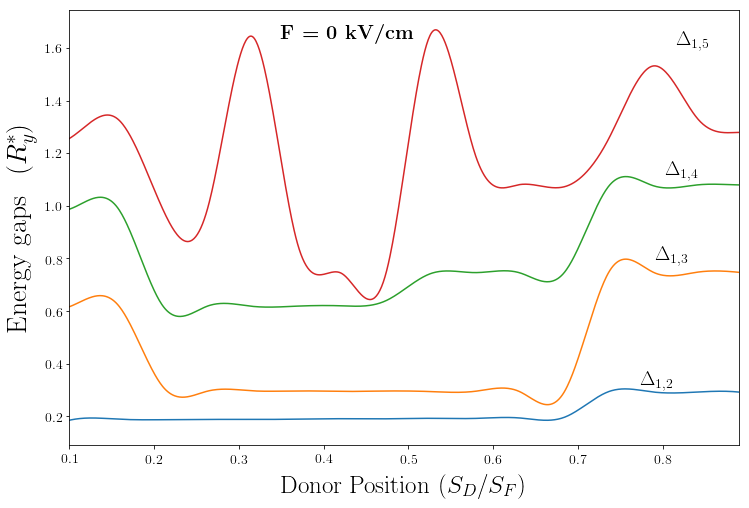

In [94]:

x =  SF_SD
p=0
y1 =  abs(Ee[p,:,0] -  Ee[p,:,1])
y2 =  abs(Ee[p,:,0] -  Ee[p,:,2])
y3 =  abs(Ee[p,:,0] -  Ee[p,:,3])
y4 =  abs(Ee[p,:,0] -  Ee[p,:,4])
y5 =  abs(Ee[p,:,0] -  Ee[p,:,5])
y6 =  abs(Ee[p,:,0] -  Ee[p,:,6])
y7 =  abs(Ee[p,:,0] -  Ee[p,:,7])
y8 =  abs(Ee[p,:,0] -  Ee[p,:,8])

#y1 =  abs(Ee[-1,:,0] -  Ee[-1,:,1])
#y2 =  abs(Ee[-1,:,0] -  Ee[-1,:,2])
#y3 =  abs(Ee[-1,:,0] -  Ee[-1,:,3])
#y4 =  abs(Ee[-1,:,0] -  Ee[-1,:,4])

t1, c1, k1 = interpolate.splrep(x, y1, s=0, k=3)
t2, c2, k2 = interpolate.splrep(x, y2, s=0, k=3)
t3, c3, k3 = interpolate.splrep(x, y3, s=0, k=3)
t4, c4, k4 = interpolate.splrep(x, y4, s=0, k=3)
t5, c5, k5 = interpolate.splrep(x, y5, s=0, k=3)
t6, c6, k6 = interpolate.splrep(x, y6, s=0, k=3)
t7, c7, k7 = interpolate.splrep(x, y7, s=0, k=3)
t8, c8, k8 = interpolate.splrep(x, y8, s=0, k=3)


#print('''\
#t: {}
#3c: {}
#k: {}
#'''.format(t, c, k))
N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=False)
spline2 = interpolate.BSpline(t2, c2, k2, extrapolate=False)
spline3 = interpolate.BSpline(t3, c3, k3, extrapolate=False)
spline4 = interpolate.BSpline(t4, c4, k4, extrapolate=False)
spline5 = interpolate.BSpline(t5, c5, k5, extrapolate=False)
spline6 = interpolate.BSpline(t6, c6, k6, extrapolate=False)
spline7 = interpolate.BSpline(t7, c7, k7, extrapolate=False)
spline8 = interpolate.BSpline(t8, c8, k8, extrapolate=False)


fig=plt.figure(figsize=(12,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)

plt.xlabel(r'Donor Position (\textbf{$S_D$}/\textbf{$S_F$})',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energy gaps \,  ($R_y^*$)',labelpad=6,fontsize=28,fontweight='bold', horizontalalignment ='center')
plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xlim(0.12,0.98)
plt.annotate(r'\textbf{F = 0 kV/cm}', xy=(280, 470), xycoords='figure points',fontsize=20)



plt.xlim(0.1,0.89)
#plt.ylim(-0.05,1.2)

plt.annotate(r'\textbf{$\Delta_{1,2}$}',xy=(640, 120), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,3}$}', xy=(655, 245), xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,4}$}', xy=(665, 330),xycoords='figure points',fontsize=20)
plt.annotate(r'\textbf{$\Delta_{1,5}$}', xy=(676, 460), xycoords='figure points',fontsize=20)


plt.plot(xx, spline1(xx), label='BSpline')
plt.plot(xx, spline2(xx), label='BSpline')
plt.plot(xx, spline3(xx), label='BSpline')
plt.plot(xx, spline4(xx), label='BSpline')
#plt.plot(xx, spline5(xx), label='BSpline')
#plt.plot(xx, spline6(xx), label='BSpline')
#plt.plot(xx, spline7(xx), label='BSpline')
#plt.plot(xx, spline8(xx), label='BSpline')

plt.savefig('1sem-GAPS.png',format='png', dpi=1000,bbox_inches="tight")
plt.savefig('1sem-GAPS.pdf',format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Making the electronic density of states DOS

In [95]:
nEe= nd # #Number of eigenvalues
#ncrv = 4  # Number of  SD
Np = 200  #Number of points to graph 
F = np.zeros((Np,Ndonor,nF)) 
X = np.zeros(Np)
Emin = -4.0 #np.min(Ee)
Emax = 0.0 #np.max(Ee)

Energy_grid = np.linspace(Emin, Emax,Np)

s=0.03
def fg(x,x0,s):
    return (s/((x-x0)**2+s**2))/np.pi

for i in range(0,Np):
    x = Energy_grid[i]
    X[i]= x
    for j in range(0,nF):
        for k in range(0,nEe): 
            x0=Ee[j,:,k]
            F[i,:,j] = F[i,:,j] + fg(x,x0,s)

In [269]:
Camp_F/0.17, Camp_F[6]/0.17, SF_SD[12]

(array([0., 1., 2., 3., 4., 5., 6.]), 6.0, 0.631578947368421)

Text(0,0.5,'V \\,  ($R_y^*$)')

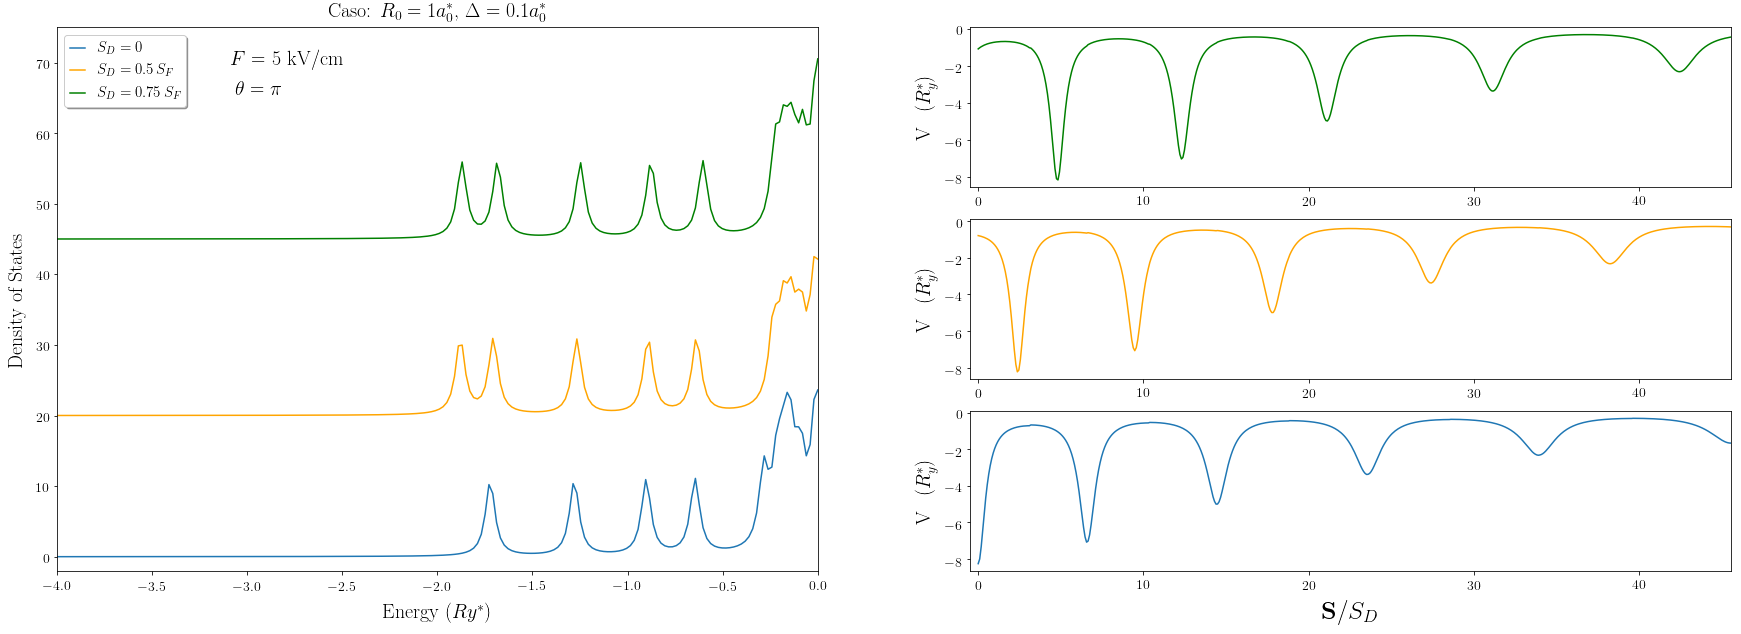

In [98]:

fig= plt.figure(figsize=[30,10])

plt.subplot(121)
plt.ylim(-2, 75)
plt.xlim(-4, 0)
plt.plot(X,F[:,0,0]) 
plt.plot(X,F[:,1,0]+ 20, color='orange')
plt.plot(X,F[:,2,0]+ 45, color='green')
plt.annotate(r'$F$ = 5 kV/cm ', xy=(230, 570), xycoords='figure points',fontsize=20)
plt.annotate('$\\theta = \pi$ ', xy=(235, 540), xycoords='figure points',fontsize=20)
#,marker='o',markersize=0.7,linestyle='')
plt.title('Caso: $R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)
plt.xlabel(r'Energy ($Ry^*$) ', labelpad=10,fontsize=20,fontweight='bold', horizontalalignment='center')           
plt.ylabel(r'Density of States',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')     
plt.legend(('$S_D=0$', '$S_D=0.5 \, S_F$', '$S_D=0.75 \, S_F$'), shadow=True, loc=(0), handlelength=1, fontsize=15)


plt.subplot(322)
#plt.ylim(-13, 0)
plt.xlim(-0.5, SF)
#plt.title('$V_{pot}$',loc='center',fontsize=20)
plt.plot( SE_grid,  VS[0,2,:], color='green' )
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')


plt.subplot(324)
#plt.ylim(-13, 0)
plt.xlim(-0.5, SF)
plt.plot( SE_grid,  VS[0,1,:], color='orange' )
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')

# SD=0
plt.subplot(326)
#plt.ylim(-14, 0)
plt.xlim(-0.5, SF)
plt.plot( SE_grid,  VS[0,0,:] )

plt.xlabel(r'\textbf{S}/\textbf{$S_D$}',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')

#plt.savefig('DOS-PotF5pi.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('DOS-PotF5pi.png',format='png', dpi=1000,bbox_inches="tight")

In [104]:
SF_SD[8]

0.42105263157894735

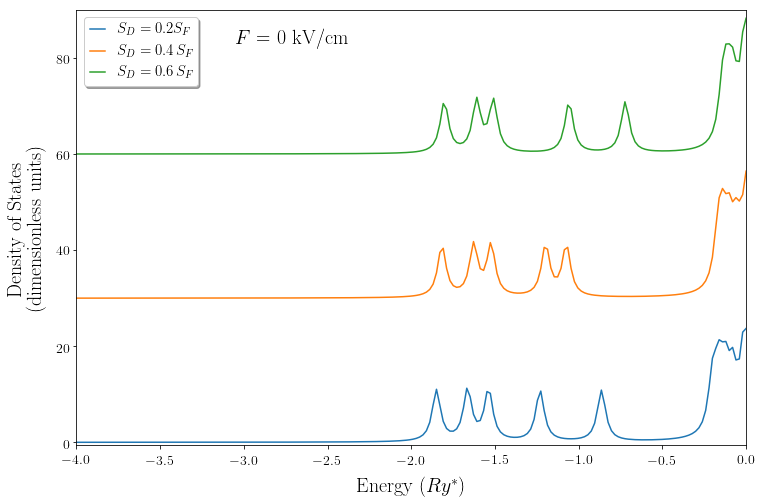

In [126]:
fig=plt.figure(figsize=(12,8) )
plt.ylim(-0.5, 90)
plt.xlim(-4, 0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(X,F[:,4,0], X,F[:,8,0] + 30, X,F[:,12,0] + 2*30 )#,marker='o',markersize=0.7,linestyle='')5
plt.annotate(r'$F$ = 0 kV/cm ', xy=(235, 460), xycoords='figure points',fontsize=20)
#plt.annotate('$\\theta = 0 $', xy=(280, 430), xycoords='figure points',fontsize=20)
#plt.title('$Caso: R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)

plt.xlabel(r'Energy ($Ry^*$) ', labelpad=10,fontsize=20,fontweight='bold', horizontalalignment='center')           
plt.ylabel(r'Density of States \\(dimensionless units)',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')     
plt.legend(('$S_D=0.2 S_F$', '$S_D=0.4 \, S_F$', '$S_D=0.6 \, S_F$'), shadow=True, loc=(0), handlelength=1, fontsize=15)

#plt.savefig('R2DOS.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('R2DOS.png',format='png', dpi=1000,bbox_inches="tight")

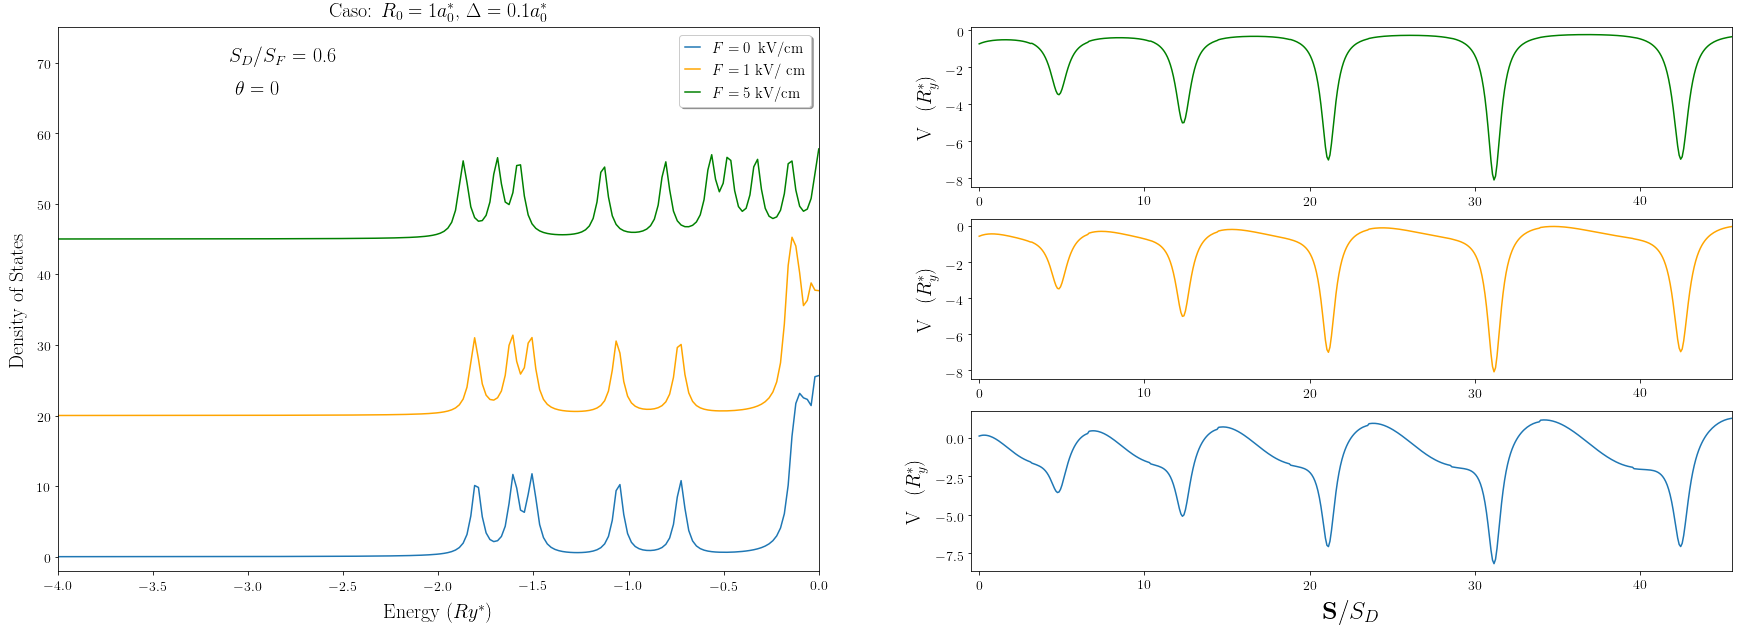

In [274]:

fig= plt.figure(figsize=[30,10])

plt.subplot(121)
plt.ylim(-2, 75)
plt.xlim(-4, 0)
plt.plot(X,F[:,13,0]) 
plt.plot(X,F[:,13,1]+ 20, color='orange')
plt.plot(X,F[:,13,5]+ 45, color='green')
plt.annotate(r'$S_D/S_F$ = 0.6 ', xy=(230, 570), xycoords='figure points',fontsize=20)
plt.annotate('$\\theta = 0$ ', xy=(235, 540), xycoords='figure points',fontsize=20)
#,marker='o',markersize=0.7,linestyle='')
plt.title('Caso: $R_0= 1 a_0^*$, $\Delta= 0.1 a_0^*$',loc='center',fontsize=20)
plt.xlabel(r'Energy ($Ry^*$) ', labelpad=10,fontsize=20,fontweight='bold', horizontalalignment='center')           
plt.ylabel(r'Density of States',labelpad=10,fontsize=20,fontweight='bold', horizontalalignment ='center')     
#plt.legend(('$S_D=0$', '$S_D=0.5 \, S_F$', '$S_D=0.75 \, S_F$'), shadow=True, loc=(0), handlelength=1, fontsize=15)
plt.legend(('$F = 0 \, $ kV/cm ', '$ F = 1$ kV/ cm ', '$ F = 5 $ kV/cm '), shadow=True, loc=(0), handlelength=1, fontsize=15)


plt.subplot(322)
#plt.ylim(-13, 0)
plt.xlim(-0.5, SF)
#plt.title('$V_{pot}$',loc='center',fontsize=20)
plt.plot( SE_grid,  VS[0,13,:], color='green' )
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')


plt.subplot(324)
#plt.ylim(-13, 0)
plt.xlim(-0.5, SF)
plt.plot( SE_grid,  VS[1,13,:], color='orange' )
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')

# SD=0
plt.subplot(326)
#plt.ylim(-14, 0)
plt.xlim(-0.5, SF)
plt.plot( SE_grid,  VS[5,13,:] )

plt.xlabel(r'\textbf{S}/\textbf{$S_D$}',labelpad=10,fontsize=25,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'V \,  ($R_y^*$)',labelpad=6,fontsize=20,fontweight='bold', horizontalalignment ='center')

#plt.savefig('DOS-PotFsd06.pdf',format='pdf', dpi=1000,bbox_inches="tight")
#plt.savefig('DOS-PotFsd06.png',format='png', dpi=1000,bbox_inches="tight")